<a href="https://colab.research.google.com/github/marches/pipeline-spill-detection/blob/main/notebooks/Spectral%20Indices%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import sys
!{sys.executable} -m pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


### EDA on Bands and Spectral Indices calculated from South Sudan Data

[Viewer for spectral calculation sanity checks.](https://apps.sentinel-hub.com/eo-browser/?zoom=16&lat=9.56062&lng=29.64262&themeId=DEFAULT-THEME&visualizationUrl=https%3A%2F%2Fservices.sentinel-hub.com%2Fogc%2Fwms%2Fbd86bcc0-f318-402b-a145-015f85b9427e&datasetId=S2L2A&fromTime=2020-01-06T00%3A00%3A00.000Z&toTime=2020-01-06T23%3A59%3A59.999Z&layerId=3_NDVI&demSource3D=%22MAPZEN%22)


Indices:
* NDVI: Normalized Difference Vegetation Index
  * (B8 - B4)/(B8 + B4)
* NDWI: Normalized Difference Water index
  * (B3 - B8)/(B3 + B8)
* RENDVI: Normalized Difference Red Edge Index
* GNDVI: Green Normalized Index

Sudan Oil Spill numpy file bands saved in ascending order: ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']

In [55]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show as showRasterio

Mounted at /content/drive


In [53]:
s1b = np.load("/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-06-25-2019.npy")
s1a = np.load("/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-09-28-2019.npy")

s1b_tif = "/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-06-25-2019.tif"
s1a_tif = "/content/drive/MyDrive/210 Capstone Project/Data/Sentinel2-SudanSpill1-09-28-2019.tif"

### RGB Bands

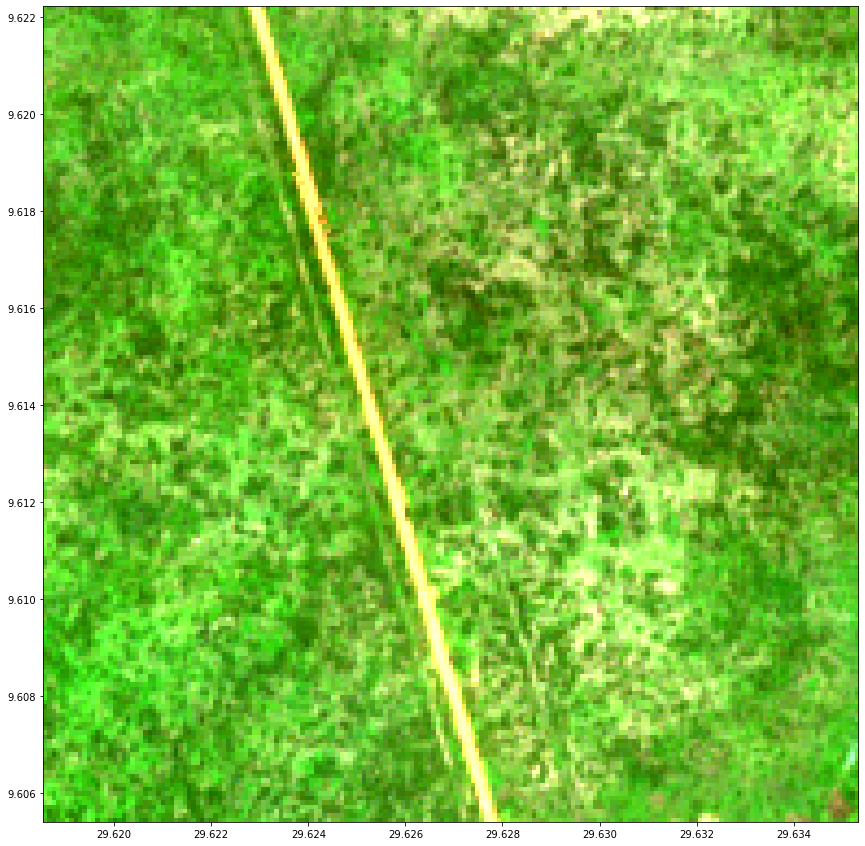

In [56]:
f,ax = plt.subplots(figsize=(15,15))

image = rasterio.open(s1b_tif)
showRasterio(image.read(), ax = ax, transform=image.transform)

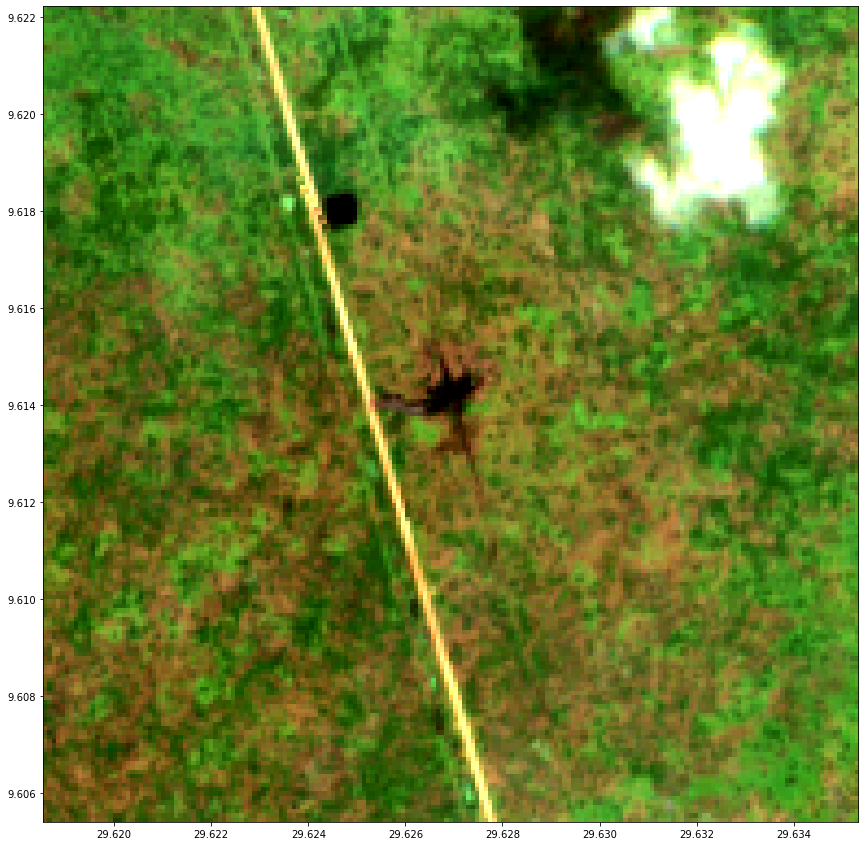

In [57]:
f,ax = plt.subplots(figsize=(15,15))

image = rasterio.open(s1a_tif)
showRasterio(image.read(), ax = ax, transform=image.transform)

### NDVI

In [15]:
def ndvi(arr):
  return (arr[:,:,6]-arr[:,:,2])/(arr[:,:,6]+arr[:,:,2])

In [20]:
s1b_ndvi = ndvi(s1b)
s1a_ndvi = ndvi(s1a)

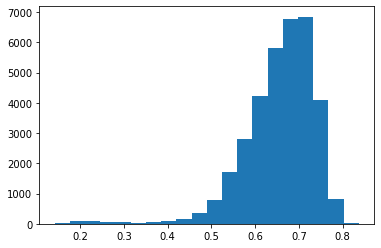

(array([1.000e+00, 2.000e+00, 2.300e+01, 7.900e+01, 9.500e+01, 1.200e+02,
        2.080e+02, 4.370e+02, 1.147e+03, 2.305e+03, 3.189e+03, 3.646e+03,
        3.771e+03, 3.719e+03, 3.758e+03, 3.883e+03, 3.742e+03, 3.026e+03,
        1.639e+03, 1.790e+02]),
 array([0.00775194, 0.05324775, 0.09874356, 0.14423936, 0.18973517,
        0.23523098, 0.28072679, 0.3262226 , 0.37171841, 0.41721422,
        0.46271003, 0.50820584, 0.55370164, 0.59919745, 0.64469326,
        0.69018907, 0.73568488, 0.78118069, 0.8266765 , 0.87217231,
        0.91766812]),
 <a list of 20 Patch objects>)

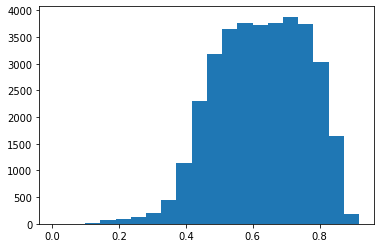

In [58]:
plt.hist(s1b_ndvi.ravel(), bins=20)
plt.show()
plt.hist(s1a_ndvi.ravel(), bins=20)

In [30]:
s1b_ndvi.shape

(187, 187)

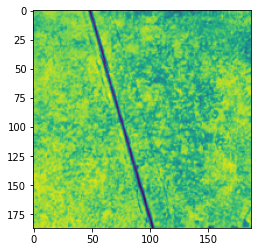

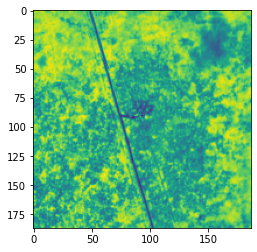

In [23]:
plt.imshow(s1b_ndvi)
plt.show()
plt.imshow(s1a_ndvi)
plt.show()

### NDWI

In [44]:
def ndwi(arr):
  return (arr[:,:,1]-arr[:,:,6])/(arr[:,:,1]+arr[:,:,6])

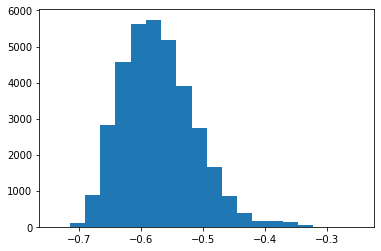

(array([1.800e+01, 2.000e+00, 7.000e+00, 1.000e+01, 1.000e+01, 1.320e+02,
        1.199e+03, 2.806e+03, 4.783e+03, 7.101e+03, 8.008e+03, 6.492e+03,
        2.690e+03, 6.260e+02, 4.130e+02, 3.590e+02, 1.840e+02, 8.200e+01,
        4.200e+01, 5.000e+00]),
 array([-0.99352751, -0.95266007, -0.91179262, -0.87092518, -0.83005774,
        -0.7891903 , -0.74832285, -0.70745541, -0.66658797, -0.62572053,
        -0.58485308, -0.54398564, -0.5031182 , -0.46225076, -0.42138331,
        -0.38051587, -0.33964843, -0.29878099, -0.25791354, -0.2170461 ,
        -0.17617866]),
 <a list of 20 Patch objects>)

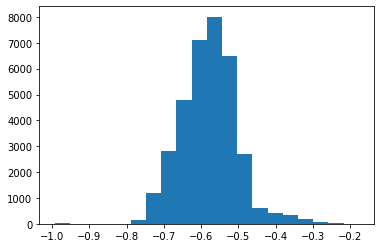

In [46]:
s1b_ndwi = ndwi(s1b)
s1a_ndwi = ndwi(s1a)

plt.hist(s1b_ndwi.ravel(), bins=20)
plt.show()
plt.hist(s1a_ndwi.ravel(), bins=20)

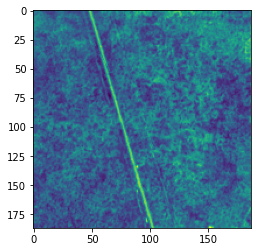

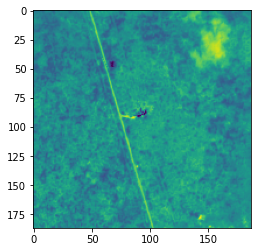

In [47]:
plt.imshow(s1b_ndwi)
plt.show()
plt.imshow(s1a_ndwi)
plt.show()